In [ ]:
import pip

/usr/local/lib/python3.11/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


In [ ]:
!pip install tensorflow-addons==0.21.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip install statsmodels

In [ ]:
!pip show statsmodels

Name: statsmodels
Version: 0.14.4
Summary: Statistical computations and models for Python
Home-page: https://www.statsmodels.org/
Author: 
Author-email: 
License: BSD License
Location: /usr/local/lib/python3.11/dist-packages
Requires: numpy, packaging, pandas, patsy, scipy
Required-by: plotnine


In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import tensorflow as tf
#import tensorflow_addons as tfa

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from keras import Sequential
from keras import layers
from keras.models import Model
from keras.layers import LSTM, BatchNormalization, Dropout, Dense, Flatten, Conv1D
from keras.layers import MaxPooling1D, GRU, Input, Masking, Concatenate, dot
from keras.optimizers import Adam, SGD
from keras.losses import MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.callbacks import EarlyStopping
from keras.callbacks import LearningRateScheduler

In [ ]:
df_energy = pd.read_csv('energy_dataset.csv')

In [ ]:
df_energy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [ ]:
df_energy.describe().T

count          mean  \
generation biomass                           35045.0    383.513540   
generation fossil brown coal/lignite         35046.0    448.059208   
generation fossil coal-derived gas           35046.0      0.000000   
generation fossil gas                        35046.0   5622.737488   
generation fossil hard coal                  35046.0   4256.065742   
generation fossil oil                        35045.0    298.319789   
generation fossil oil shale                  35046.0      0.000000   
generation fossil peat                       35046.0      0.000000   
generation geothermal                        35046.0      0.000000   
generation hydro pumped storage aggregated       0.0           NaN   
generation hydro pumped storage consumption  35045.0    475.577343   
generation hydro run-of-river and poundage   35045.0    972.116108   
generation hydro water reservoir             35046.0   2605.114735   
generation marine                            35045.0      0.000000   
generation nuclear                           35047.0   6263.907039   
generation other                             35046.0     60.228585   
generation other renewable                   35046.0     85.639702   
generation solar                             35046.0   1432.665925   
generation waste                             35045.0    269.452133   
generation wind offshore                     35046.0      0.000000   
generation wind onshore                      35046.0   5464.479769   
forecast solar day ahead                     35064.0   1439.066735   
forecast wind offshore eday ahead                0.0           NaN   
forecast wind onshore day ahead              35064.0   5471.216689   
total load forecast                          35064.0  28712.129962   
total load actual                            35028.0  28696.939905   
price day ahead                              35064.0     49.874341   
price actual                                 35064.0     57.884023   

                                                     std       min  \
generation biomass                             85.353943      0.00   
generation fossil brown coal/lignite          354.568590      0.00   
generation fossil coal-derived gas              0.000000      0.00   
generation fossil gas                        2201.830478      0.00   
generation fossil hard coal                  1961.601013      0.00   
generation fossil oil                          52.520673      0.00   
generation fossil oil shale                     0.000000      0.00   
generation fossil peat                          0.000000      0.00   
generation geothermal                           0.000000      0.00   
generation hydro pumped storage aggregated           NaN       NaN   
generation hydro pumped storage consumption   792.406614      0.00   
generation hydro run-of-river and poundage    400.777536      0.00   
generation hydro water reservoir             1835.199745      0.00   
generation marine                               0.000000      0.00   
generation nuclear                            839.667958      0.00   
generation other                               20.238381      0.00   
generation other renewable                     14.077554      0.00   
generation solar                             1680.119887      0.00   
generation waste                               50.195536      0.00   
generation wind offshore                        0.000000      0.00   
generation wind onshore                      3213.691587      0.00   
forecast solar day ahead                     1677.703355      0.00   
forecast wind offshore eday ahead                    NaN       NaN   
forecast wind onshore day ahead              3176.312853    237.00   
total load forecast                          4594.100854  18105.00   
total load actual                            4574.987950  18041.00   
price day ahead                                14.618900      2.06   
price actual                                   14.204083

In [ ]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [ ]:
col_names = ['generation fossil coal-derived gas', 'generation fossil oil shale','generation fossil peat',
           'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine',
           'generation wind offshore', 'forecast wind offshore eday ahead', 'forecast solar day ahead',
            'forecast wind onshore day ahead']

In [ ]:
df_energy = df_energy.drop(col_names, axis=1)

In [ ]:
#checking Nans and duplicates in each columns

def check_Nans_Dups(df_input):
    print('Number of Nans in each column :')
    print(df_input.isnull().sum())
    print()
    print(f'Number of duplicates in the dataframe : {df_input.duplicated().sum()}')
    return

In [ ]:
check_Nans_Dups(df_energy)

Number of Nans in each column :
time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load forecast                             0
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

Numb

In [ ]:
df_energy['time'] = pd.to_datetime(df_energy['time'])
df_energy = df_energy.set_index('time')
df_energy

<ipython-input-13-c0cd3855ec4e>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_energy['time'] = pd.to_datetime(df_energy['time'])


generation biomass  \
time                                            
2015-01-01 00:00:00+01:00               447.0   
2015-01-01 01:00:00+01:00               449.0   
2015-01-01 02:00:00+01:00               448.0   
2015-01-01 03:00:00+01:00               438.0   
2015-01-01 04:00:00+01:00               428.0   
...                                       ...   
2018-12-31 19:00:00+01:00               297.0   
2018-12-31 20:00:00+01:00               296.0   
2018-12-31 21:00:00+01:00               292.0   
2018-12-31 22:00:00+01:00               293.0   
2018-12-31 23:00:00+01:00               290.0   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-01 00:00:00+01:00                                 329.0   
2015-01-01 01:00:00+01:00                                 328.0   
2015-01-01 02:00:00+01:00                                 323.0   
2015-01-01 03:00:00+01:00                                 254.0   
2015-01-01 04:00:00+01:00                                 187.0   
...                                                         ...   
2018-12-31 19:00:00+01:00                                   0.0   
2018-12-31 20:00:00+01:00                                   0.0   
2018-12-31 21:00:00+01:00                                   0.0   
2018-12-31 22:00:00+01:00                                   0.0   
2018-12-31 23:00:00+01:00                                   0.0   

                           generation fossil gas  generation fossil hard coal  \
time                                                                            
2015-01-01 00:00:00+01:00                 4844.0                       4821.0   
2015-01-01 01:00:00+01:00                 5196.0                       4755.0   
2015-01-01 02:00:00+01:00                 4857.0                       4581.0   
2015-01-01 03:00:00+01:00                 4314.0                       4131.0   
2015-01-01 04:00:00+01:00                 4130.0                       3840.0   
...                                          ...                          ...   
2018-12-31 19:00:00+01:00                 7634.0                       2628.0   
2018-12-31 20:00:00+01:00                 7241.0                       2566.0   
2018-12-31 21:00:00+01:00                 7025.0                       2422.0   
2018-12-31 22:00:00+01:00                 6562.0                       2293.0   
2018-12-31 23:00:00+01:00                 6926.0                       2166.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2018-12-31 19:00:00+01:00                  178.0   
2018-12-31 20:00:00+01:00                  174.0   
2018-12-31 21:00:00+01:00                  168.0   
2018-12-31 22:00:00+01:00                  163.0   
2018-12-31 23:00:00+01:00                  163.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2018-12-31 19:00:00+01:00                                          1.0   
2018-12-31 20:00:00+01:00                                          1.0   
2018-12-31 21:00:00+01:00                     

Text(0, 0.5, 'total load actual')

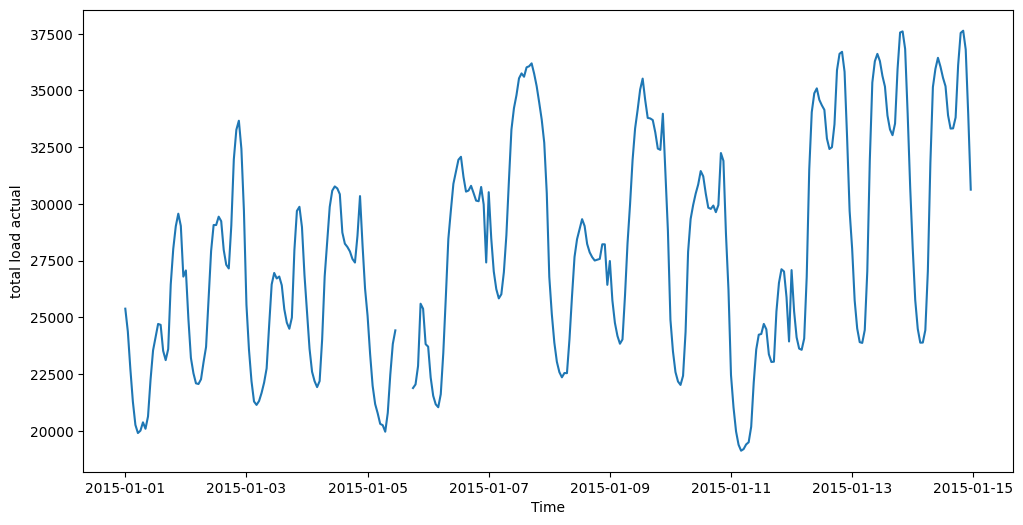

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_energy['total load actual'][:24*7*2])
plt.xlabel('Time')
plt.ylabel('total load actual')

In [ ]:
df_energy[df_energy.isna().any(axis =1)]

generation biomass  \
time                                            
2015-01-05 03:00:00+01:00                 NaN   
2015-01-05 12:00:00+01:00                 NaN   
2015-01-05 13:00:00+01:00                 NaN   
2015-01-05 14:00:00+01:00                 NaN   
2015-01-05 15:00:00+01:00                 NaN   
2015-01-05 16:00:00+01:00                 NaN   
2015-01-05 17:00:00+01:00                 NaN   
2015-01-19 19:00:00+01:00                 NaN   
2015-01-19 20:00:00+01:00                 NaN   
2015-01-27 19:00:00+01:00                 NaN   
2015-01-28 13:00:00+01:00                 NaN   
2015-02-01 07:00:00+01:00               449.0   
2015-02-01 08:00:00+01:00               453.0   
2015-02-01 09:00:00+01:00               452.0   
2015-02-01 12:00:00+01:00               405.0   
2015-02-01 13:00:00+01:00               402.0   
2015-02-01 14:00:00+01:00               400.0   
2015-02-01 15:00:00+01:00               393.0   
2015-02-01 16:00:00+01:00               413.0   
2015-02-01 17:00:00+01:00               465.0   
2015-02-01 18:00:00+01:00               482.0   
2015-02-01 19:00:00+01:00               474.0   
2015-04-05 03:00:00+02:00               371.0   
2015-04-16 09:00:00+02:00                 NaN   
2015-04-20 08:00:00+02:00               424.0   
2015-04-23 21:00:00+02:00                 NaN   
2015-05-02 10:00:00+02:00               497.0   
2015-05-29 03:00:00+02:00               569.0   
2015-06-15 09:00:00+02:00                 NaN   
2015-10-02 08:00:00+02:00               483.0   
2015-10-02 11:00:00+02:00                 NaN   
2015-12-02 09:00:00+01:00                 NaN   
2016-04-13 05:00:00+02:00               220.0   
2016-04-25 05:00:00+02:00               190.0   
2016-04-25 07:00:00+02:00               206.0   
2016-05-10 23:00:00+02:00               348.0   
2016-06-12 01:00:00+02:00               356.0   
2016-07-09 22:00:00+02:00                 NaN   
2016-07-12 00:00:00+02:00               346.0   
2016-09-28 09:00:00+02:00               347.0   
2016-10-27 23:00:00+02:00               351.0   
2016-11-23 04:00:00+01:00                 NaN   
2017-11-14 12:00:00+01:00                 0.0   
2017-11-14 19:00:00+01:00                 0.0   
2018-06-11 18:00:00+02:00               331.0   
2018-07-11 09:00:00+02:00                 NaN   

                           generation fossil brown coal/lignite  \
time                                                              
2015-01-05 03:00:00+01:00                                   NaN   
2015-01-05 12:00:00+01:00                                   NaN   
2015-01-05 13:00:00+01:00                                   NaN   
2015-01-05 14:00:00+01:00                                   NaN   
2015-01-05 15:00:00+01:00                                   NaN   
2015-01-05 16:00:00+01:00                                   NaN   
2015-01-05 17:00:00+01:00                                   NaN   
2015-01-19 19:00:00+01:00                                   NaN   
2015-01-19 20:00:00+01:00                                   NaN   
2015-01-27 19:00:00+01:00                                   NaN   
2015-01-28 13:00:00+01:00                                   NaN   
2015-02-01 07:00:00+01:00                                 312.0   
2015-02-01 08:00:00+01:00                                 312.0   
2015-02-01 09:00:00+01:00                                 302.0   
2015-02-01 12:00:00+01:00                                 317.0   
2015-02-01 13:00:00+01:00                                 317.0   
2015-02-01 14:00:00+01:00                                 317.0   
2015-02-01 15:00:00+01:00                                 321.0   
2015-02-01 16:00:00+01:00                                 325.0   
2015-02-01 17:00:00+01:00                                 321.0   
2015-02-01 18:00:00+01:00                                 326.0   
2015-02-01 19:00:00+01:00                                 326.0   
2015-04-05 03:00:00+02:00                                   0.0   

In [ ]:
df_energy.interpolate(method='linear', limit_direction='forward', inplace = True)

In [ ]:
df_energy.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

FEATURE CORRELATION

In [ ]:
def feat_corr(input_df):
    corr = input_df.corr()
    plt.figure(figsize=(15,12))

    g=sns.heatmap(corr, annot = True, cmap="RdYlGn", vmin = -1, vmax =1 )
    plt.title('Feature Correlation')

    return plt.show()

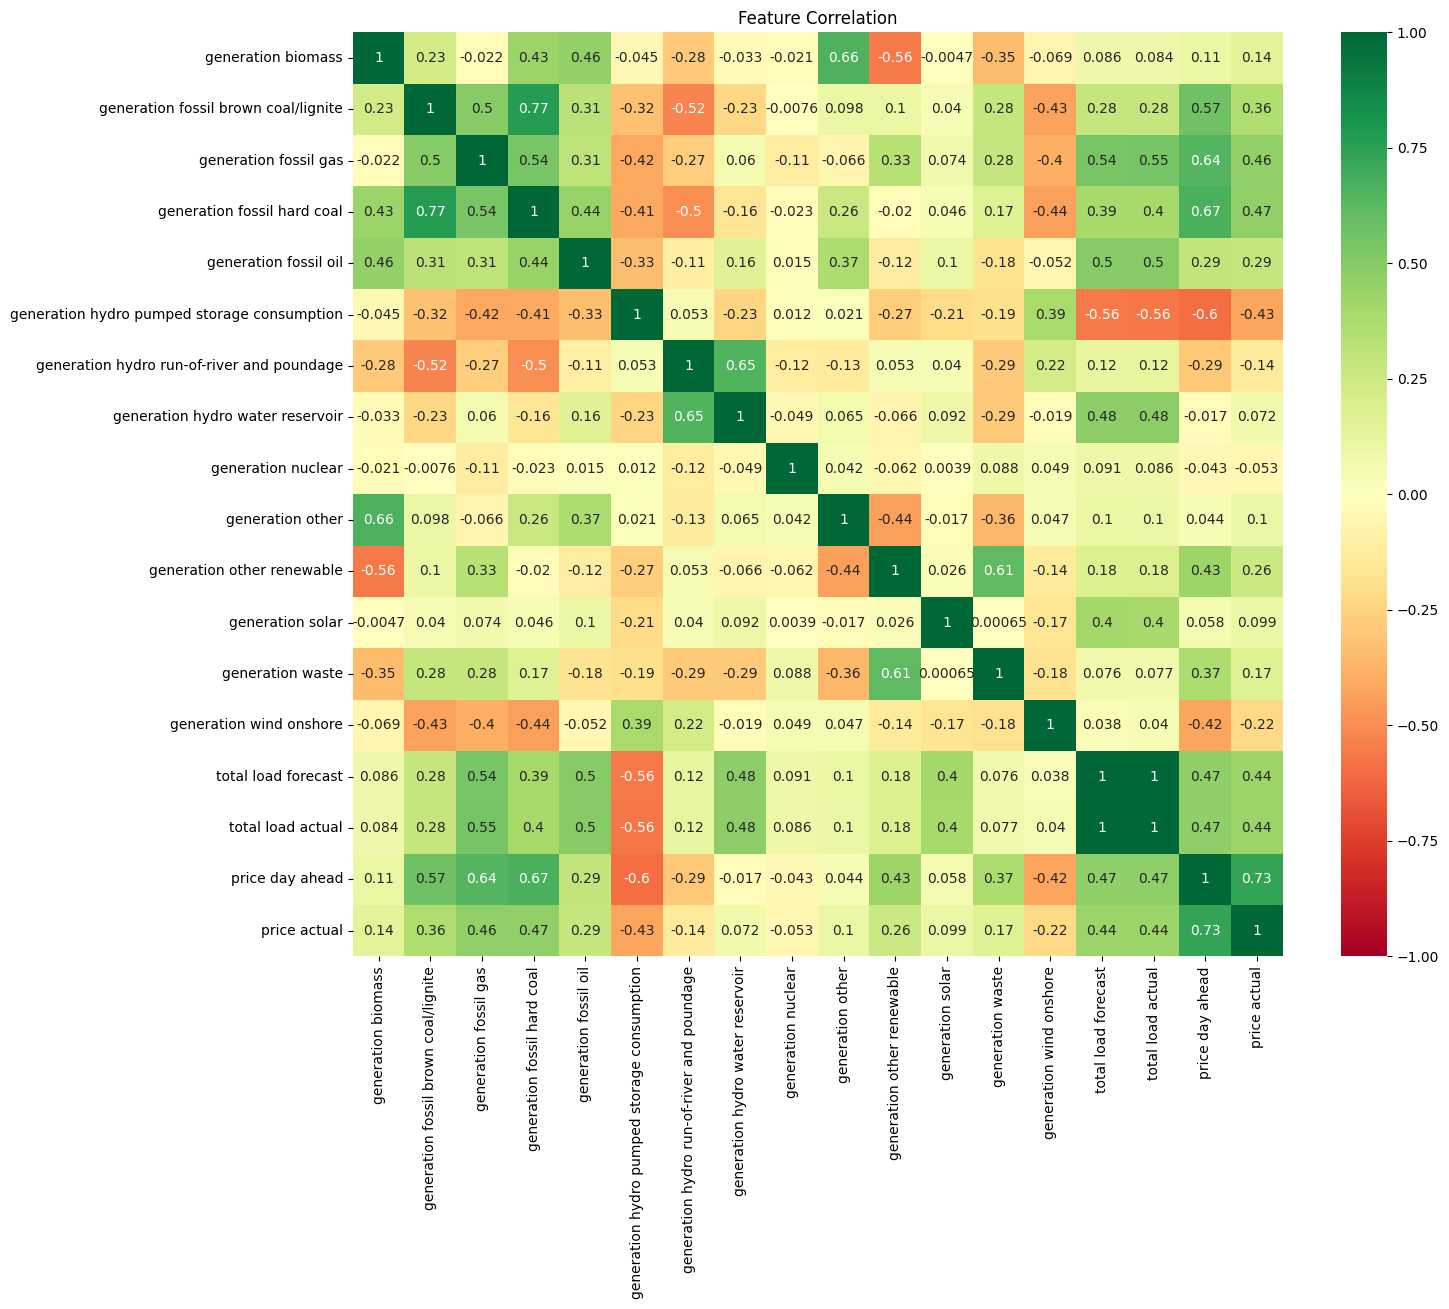

In [ ]:
feat_corr(df_energy)

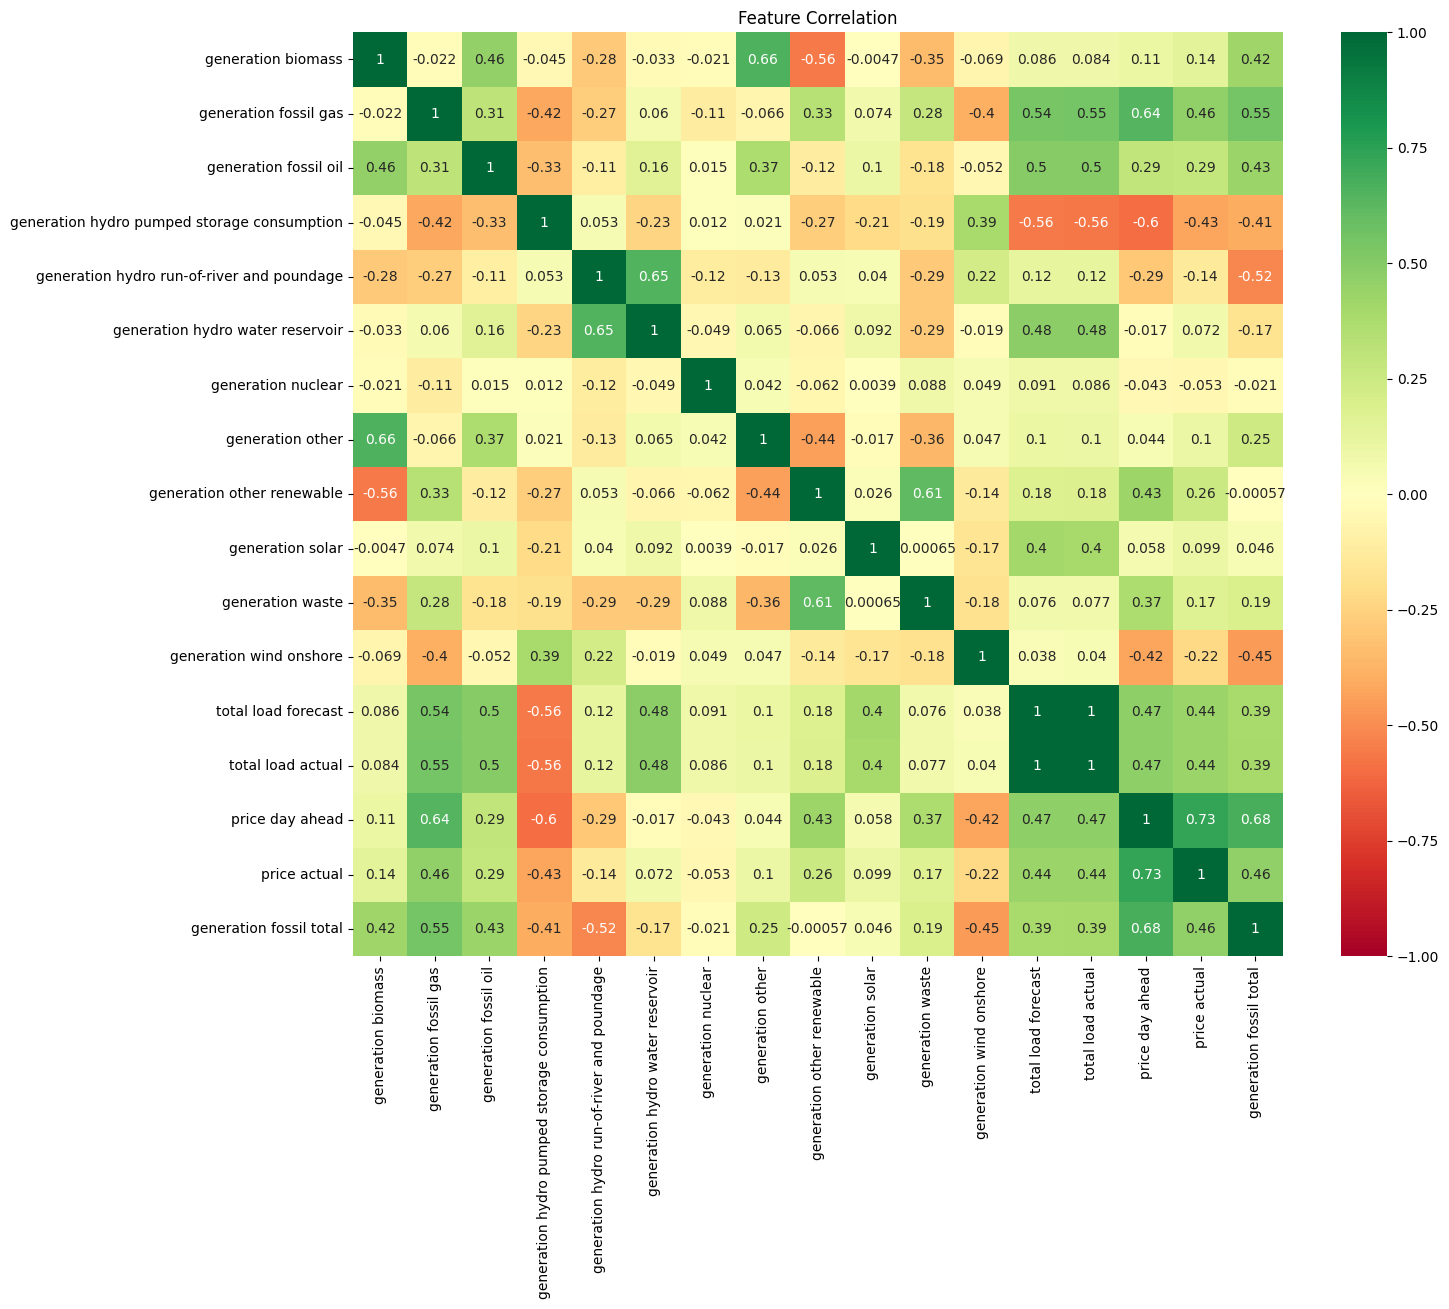

In [ ]:
df_energy["generation fossil total"] = df_energy['generation fossil hard coal'] + df_energy['generation fossil brown coal/lignite']
df_energy.drop(['generation fossil hard coal', 'generation fossil brown coal/lignite'], axis = 1, inplace = True)
feat_corr(df_energy)

In [ ]:
df_weather = pd.read_csv('weather_features.csv')

In [ ]:
df_weather.head()

dt_iso city_name     temp  temp_min  temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
1  2015-01-01 01:00:00+01:00  Valencia  270.475   270.475   270.475      1001   
2  2015-01-01 02:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
3  2015-01-01 03:00:00+01:00  Valencia  269.686   269.686   269.686      1002   
4  2015-01-01 04:00:00+01:00  Valencia  269.686   269.686   269.686      1002   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0        77           1        62      0.0      0.0      0.0           0   
1        77           1        62      0.0      0.0      0.0           0   
2        78           0        23      0.0      0.0      0.0           0   
3        78           0        23      0.0      0.0      0.0           0   
4        78           0        23      0.0      0.0      0.0           0   

   weather_id weather_main weather_description weather_icon  
0         800        clear        sky is clear          01n  
1         800        clear        sky is clear          01n  
2         800        clear        sky is clear          01n  
3         800        clear        sky is clear          01n  
4         800        clear        sky is clear          01n

In [ ]:

df_temp = df_weather.copy(deep = True)
labels = ['weather_id', 'weather_main','weather_description','weather_icon']
for col in labels:
    df_temp[col] = LabelEncoder().fit_transform(df_weather[col])

In [ ]:
def feat_corr(input_df):
    # Select only numeric columns
    numeric_df = input_df.select_dtypes(include=[np.number])

    if numeric_df.shape[1] == 0:
        print("No numeric columns found for correlation.")
        return

    corr = numeric_df.corr()

    plt.figure(figsize=(15,12))
    g = sns.heatmap(corr, annot=True, cmap="RdYlGn", vmin=-1, vmax=1)
    plt.title('Feature Correlation')

    return plt.show()


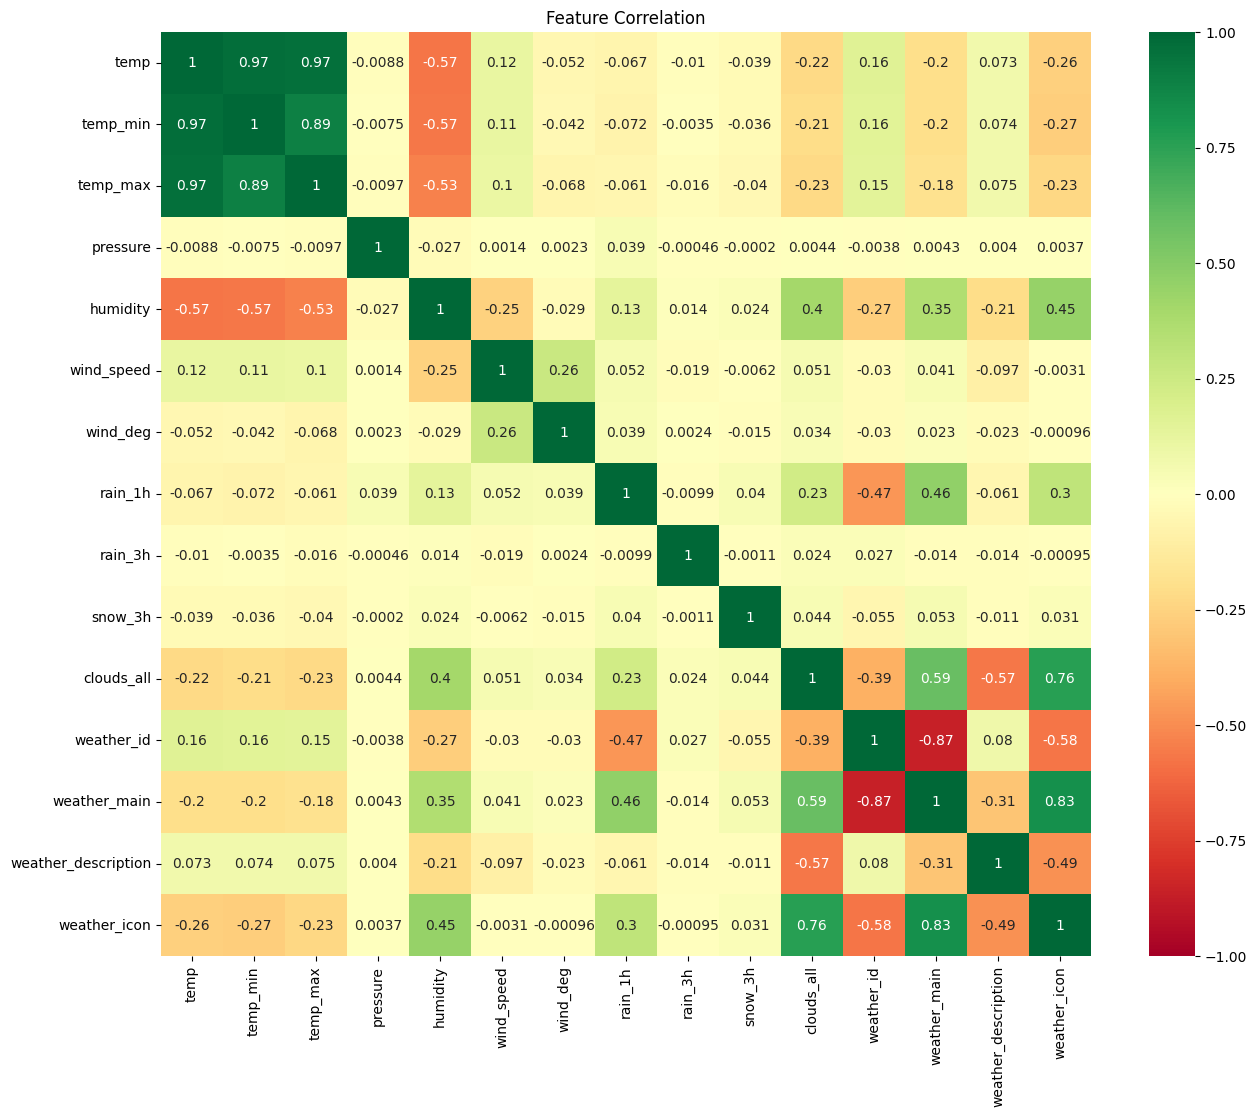

In [ ]:
feat_corr(df_temp)

In [ ]:
df_weather['weather_id'].unique()

array([800, 801, 802, 803, 804, 500, 501, 502, 701, 522, 521, 503, 202,
       200, 201, 211, 520, 300, 741, 301, 711, 302, 721, 310, 600, 616,
       615, 601, 210, 602, 611, 311, 612, 620, 531, 731, 761, 771])

In [ ]:
col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon', 'temp_min', 'temp_max']
# col_drop_name = ['weather_id', 'weather_main','weather_description','weather_icon']
df_weather.drop(col_drop_name, axis = 1 , inplace = True)

In [ ]:
check_Nans_Dups(df_weather)

Number of Nans in each column :
dt_iso        0
city_name     0
temp          0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
rain_1h       0
rain_3h       0
snow_3h       0
clouds_all    0
dtype: int64

Number of duplicates in the dataframe : 3076


In [ ]:
df_weather = df_weather.reset_index().drop_duplicates()

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])
df_weather.drop(["dt_iso"] , axis = 1, inplace = True)
df_weather = df_weather.set_index('time')
df_weather.drop(["index"] , axis = 1, inplace = True)

<ipython-input-30-f2d592ef1b17>:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df_weather['time'] = pd.to_datetime(df_weather['dt_iso'])


In [ ]:
df_weather

city_name     temp  pressure  humidity  wind_speed  \
time                                                                           
2015-01-01 00:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 01:00:00+01:00  Valencia  270.475      1001        77           1   
2015-01-01 02:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 03:00:00+01:00  Valencia  269.686      1002        78           0   
2015-01-01 04:00:00+01:00  Valencia  269.686      1002        78           0   
...                             ...      ...       ...       ...         ...   
2018-12-31 19:00:00+01:00   Seville  287.760      1028        54           3   
2018-12-31 20:00:00+01:00   Seville  285.760      1029        62           3   
2018-12-31 21:00:00+01:00   Seville  285.150      1028        58           4   
2018-12-31 22:00:00+01:00   Seville  284.150      1029        57           4   
2018-12-31 23:00:00+01:00   Seville  283.970      1029        70           3   

                           wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  
time                                                                        
2015-01-01 00:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0      0.0           0  
...                             ...      ...      ...      ...         ...  
2018-12-31 19:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 20:00:00+01:00        30      0.0      0.0      0.0           0  
2018-12-31 21:00:00+01:00        50      0.0      0.0      0.0           0  
2018-12-31 22:00:00+01:00        60      0.0      0.0      0.0           0  
2018-12-31 23:00:00+01:00        50      0.0      0.0      0.0           0  

[178396 rows x 10 columns]

In [ ]:
df_energy

generation biomass  generation fossil gas  \
time                                                                   
2015-01-01 00:00:00+01:00               447.0                 4844.0   
2015-01-01 01:00:00+01:00               449.0                 5196.0   
2015-01-01 02:00:00+01:00               448.0                 4857.0   
2015-01-01 03:00:00+01:00               438.0                 4314.0   
2015-01-01 04:00:00+01:00               428.0                 4130.0   
...                                       ...                    ...   
2018-12-31 19:00:00+01:00               297.0                 7634.0   
2018-12-31 20:00:00+01:00               296.0                 7241.0   
2018-12-31 21:00:00+01:00               292.0                 7025.0   
2018-12-31 22:00:00+01:00               293.0                 6562.0   
2018-12-31 23:00:00+01:00               290.0                 6926.0   

                           generation fossil oil  \
time                                               
2015-01-01 00:00:00+01:00                  162.0   
2015-01-01 01:00:00+01:00                  158.0   
2015-01-01 02:00:00+01:00                  157.0   
2015-01-01 03:00:00+01:00                  160.0   
2015-01-01 04:00:00+01:00                  156.0   
...                                          ...   
2018-12-31 19:00:00+01:00                  178.0   
2018-12-31 20:00:00+01:00                  174.0   
2018-12-31 21:00:00+01:00                  168.0   
2018-12-31 22:00:00+01:00                  163.0   
2018-12-31 23:00:00+01:00                  163.0   

                           generation hydro pumped storage consumption  \
time                                                                     
2015-01-01 00:00:00+01:00                                        863.0   
2015-01-01 01:00:00+01:00                                        920.0   
2015-01-01 02:00:00+01:00                                       1164.0   
2015-01-01 03:00:00+01:00                                       1503.0   
2015-01-01 04:00:00+01:00                                       1826.0   
...                                                                ...   
2018-12-31 19:00:00+01:00                                          1.0   
2018-12-31 20:00:00+01:00                                          1.0   
2018-12-31 21:00:00+01:00                                         50.0   
2018-12-31 22:00:00+01:00                                        108.0   
2018-12-31 23:00:00+01:00                                        108.0   

                           generation hydro run-of-river and poundage  \
time                                                                    
2015-01-01 00:00:00+01:00                                      1051.0   
2015-01-01 01:00:00+01:00                                      1009.0   
2015-01-01 02:00:00+01:00                                       973.0   
2015-01-01 03:00:00+01:00                                       949.0   
2015-01-01 04:00:00+01:00                                       953.0   
...                                                               ...   
2018-12-31 19:00:00+01:00                                      1135.0   
2018-12-31 20:00:00+01:00                                      1172.0   
2018-12-31 21:00:00+01:00                                      1148.0   
2018-12-31 22:00:00+01:00                                      1128.0   
2018-12-31 23:00:00+01:00                                      1069.0   

                           generation hydro water reservoir  \
time                                                          
2015-01-01 00:00:00+01:00                            1899.0   
2015-01-01 01:00:00+01:00                            1658.0   
2015-01-01 02:00:00+01:00                            1371.0   
2015-01-01 03:00:00+01:00                             779.0   
2015-01-01 04:00:00+01:00                             720.0   
...                                                     ...

In [ ]:
df_weather.describe().round(2)

temp    pressure   humidity  wind_speed   wind_deg    rain_1h  \
count  178396.00   178396.00  178396.00   178396.00  178396.00  178396.00   
mean      289.62     1069.26      68.42        2.47     166.59       0.08   
std         8.03     5969.63      21.90        2.10     116.61       0.40   
min       262.24        0.00       0.00        0.00       0.00       0.00   
25%       283.67     1013.00      53.00        1.00      55.00       0.00   
50%       289.15     1018.00      72.00        2.00     177.00       0.00   
75%       295.15     1022.00      87.00        4.00     270.00       0.00   
max       315.60  1008371.00     100.00      133.00     360.00      12.00   

         rain_3h    snow_3h  clouds_all  
count  178396.00  178396.00   178396.00  
mean        0.00       0.00       25.07  
std         0.01       0.22       30.77  
min         0.00       0.00        0.00  
25%         0.00       0.00        0.00  
50%         0.00       0.00       20.00  
75%         0.00       0.00       40.00  
max         2.32      21.50      100.00

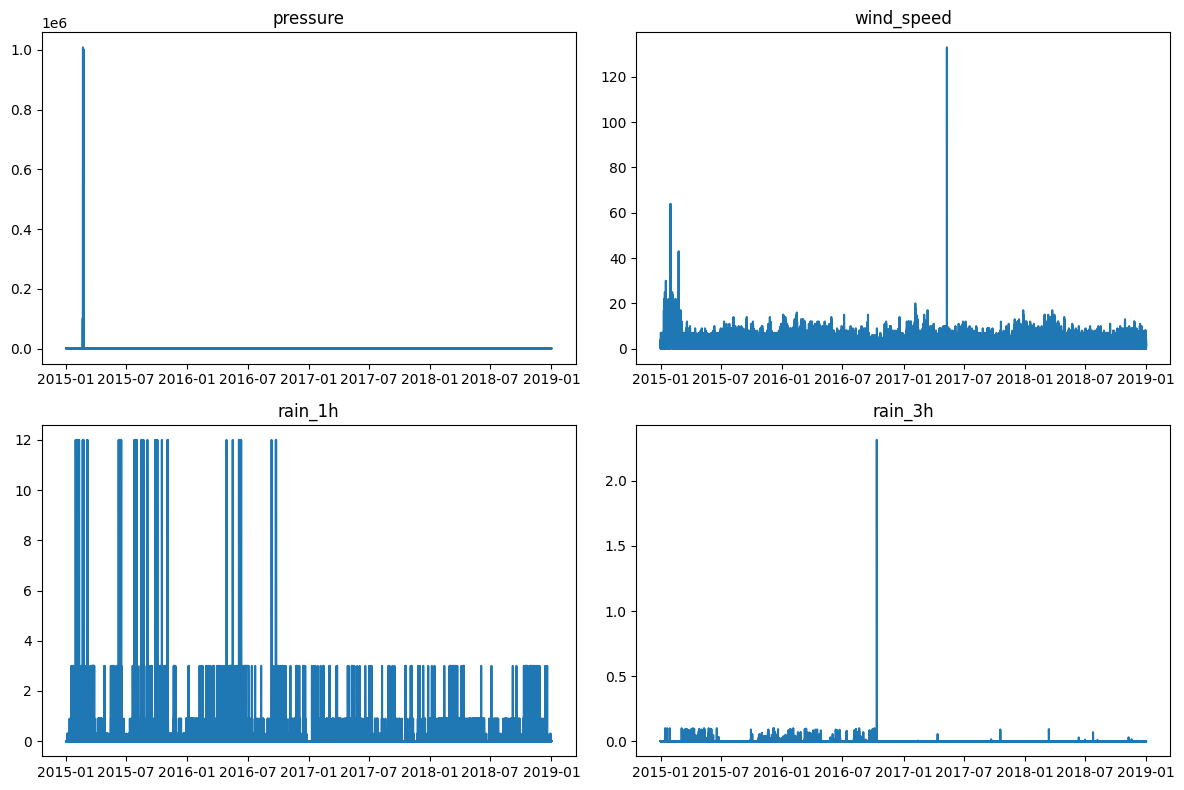

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.plot(df_weather.index, df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

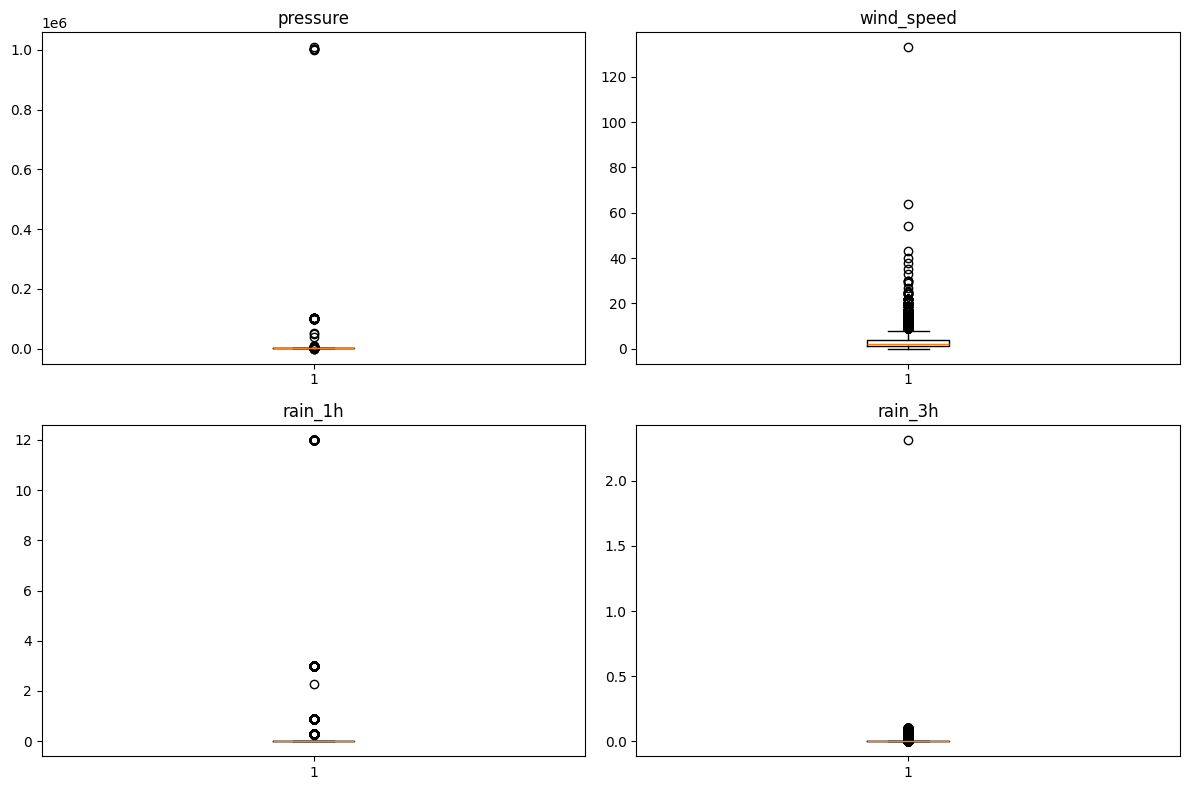

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df_weather.loc[df_weather['pressure']  > 1080,  'pressure'] = np.nan
df_weather.loc[df_weather['pressure']   < 870,  'pressure'] = np.nan
df_weather.loc[df_weather['wind_speed'] > 113, 'wind_speed'] = np.nan

df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)

<ipython-input-36-e09d3d1c477d>:5: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_weather.interpolate(method ='linear', limit_direction ='forward', inplace = True)


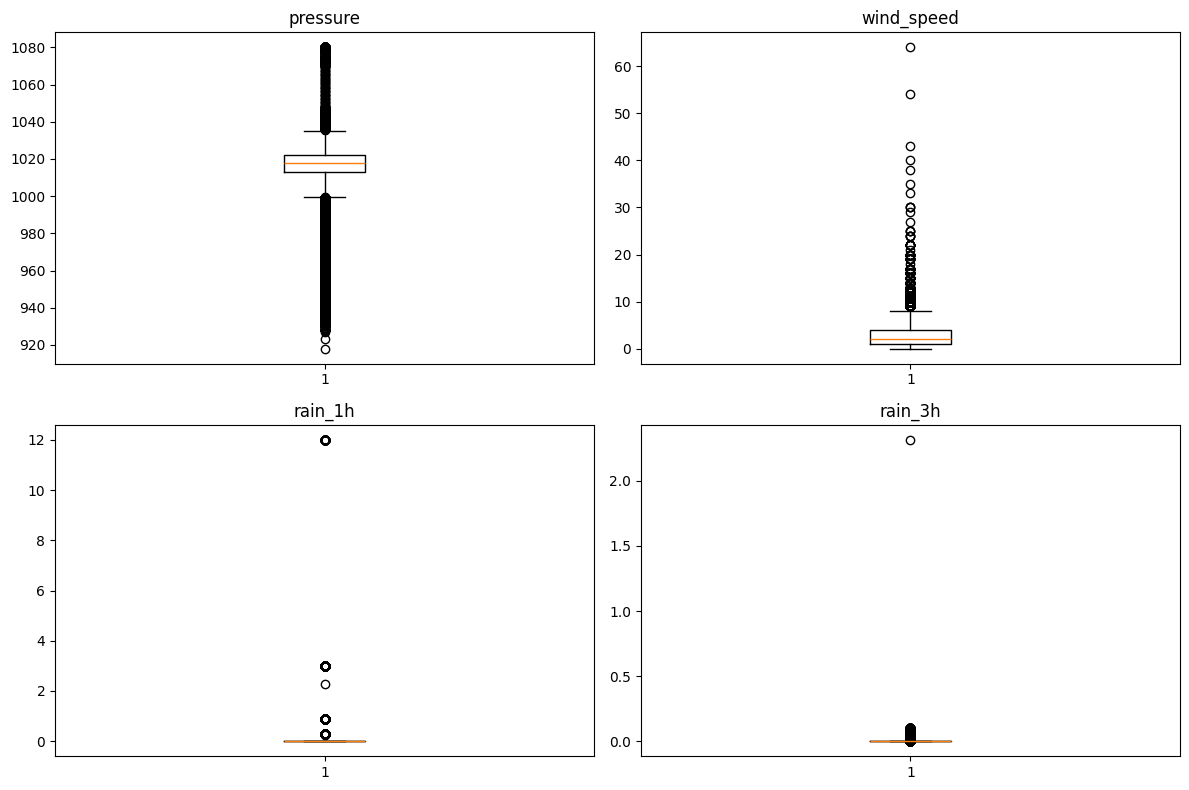

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# select the columns to plot
columns_to_plot = ['pressure', 'wind_speed', 'rain_1h', 'rain_3h']

# loop through the subplots and plot each column
for i, ax in enumerate(axes.flat):
    if i < len(columns_to_plot):
        ax.boxplot(x = df_weather[columns_to_plot[i]])
        ax.set_title(columns_to_plot[i])
    else:
        ax.set_visible(False)

plt.tight_layout()  # adjust the spacing between subplots
plt.show()  # display the plot

In [ ]:
# \drop rain_h3
df_weather.drop(['rain_3h'], axis = 1 , inplace = True)

In [ ]:
print(f'Number of samples in df_energy is {df_energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35145
Number of samples in df_weather in Madrid is 36267
Number of samples in df_weather in Bilbao is 35951
Number of samples in df_weather in  Barcelona is 35476
Number of samples in df_weather in Seville is 35557


In [ ]:
df_weather_cleaned = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], keep='first').set_index('time')

In [ ]:
df_weather_cleaned

city_name     temp  pressure  humidity  wind_speed  \
time                                                                           
2015-01-01 00:00:00+01:00  Valencia  270.475    1001.0        77         1.0   
2015-01-01 01:00:00+01:00  Valencia  270.475    1001.0        77         1.0   
2015-01-01 02:00:00+01:00  Valencia  269.686    1002.0        78         0.0   
2015-01-01 03:00:00+01:00  Valencia  269.686    1002.0        78         0.0   
2015-01-01 04:00:00+01:00  Valencia  269.686    1002.0        78         0.0   
...                             ...      ...       ...       ...         ...   
2018-12-31 19:00:00+01:00   Seville  287.760    1028.0        54         3.0   
2018-12-31 20:00:00+01:00   Seville  285.760    1029.0        62         3.0   
2018-12-31 21:00:00+01:00   Seville  285.150    1028.0        58         4.0   
2018-12-31 22:00:00+01:00   Seville  284.150    1029.0        57         4.0   
2018-12-31 23:00:00+01:00   Seville  283.970    1029.0        70         3.0   

                           wind_deg  rain_1h  snow_3h  clouds_all  
time                                                               
2015-01-01 00:00:00+01:00        62      0.0      0.0           0  
2015-01-01 01:00:00+01:00        62      0.0      0.0           0  
2015-01-01 02:00:00+01:00        23      0.0      0.0           0  
2015-01-01 03:00:00+01:00        23      0.0      0.0           0  
2015-01-01 04:00:00+01:00        23      0.0      0.0           0  
...                             ...      ...      ...         ...  
2018-12-31 19:00:00+01:00        30      0.0      0.0           0  
2018-12-31 20:00:00+01:00        30      0.0      0.0           0  
2018-12-31 21:00:00+01:00        50      0.0      0.0           0  
2018-12-31 22:00:00+01:00        60      0.0      0.0           0  
2018-12-31 23:00:00+01:00        50      0.0      0.0           0  

[175320 rows x 9 columns]

In [ ]:
print(f'Number of samples in df_energy is {df_energy.shape[0]}')

city_list = df_weather['city_name'].unique()
grouped_weather = df_weather_cleaned.groupby('city_name')

for city in city_list:
    print(f'Number of samples in df_weather in {city} is {grouped_weather.get_group(city).shape[0]}')

Number of samples in df_energy is 35064
Number of samples in df_weather in Valencia is 35064
Number of samples in df_weather in Madrid is 35064
Number of samples in df_weather in Bilbao is 35064
Number of samples in df_weather in  Barcelona is 35064
Number of samples in df_weather in Seville is 35064


In [ ]:
df_weather_all_cities = [grouped_weather.get_group(x) for x in grouped_weather.groups]

In [ ]:
df_weather_all_cities[0]

city_name     temp  pressure  humidity  \
time                                                                 
2015-01-01 00:00:00+01:00   Barcelona  281.625    1035.0       100   
2015-01-01 01:00:00+01:00   Barcelona  281.625    1035.0       100   
2015-01-01 02:00:00+01:00   Barcelona  281.286    1036.0       100   
2015-01-01 03:00:00+01:00   Barcelona  281.286    1036.0       100   
2015-01-01 04:00:00+01:00   Barcelona  281.286    1036.0       100   
...                               ...      ...       ...       ...   
2018-12-31 19:00:00+01:00   Barcelona  284.130    1027.0        71   
2018-12-31 20:00:00+01:00   Barcelona  282.640    1027.0        62   
2018-12-31 21:00:00+01:00   Barcelona  282.140    1028.0        53   
2018-12-31 22:00:00+01:00   Barcelona  281.130    1028.0        50   
2018-12-31 23:00:00+01:00   Barcelona  280.130    1028.0       100   

                           wind_speed  wind_deg  rain_1h  snow_3h  clouds_all  
time                                                                           
2015-01-01 00:00:00+01:00         7.0        58      0.0      0.0           0  
2015-01-01 01:00:00+01:00         7.0        58      0.0      0.0           0  
2015-01-01 02:00:00+01:00         7.0        48      0.0      0.0           0  
2015-01-01 03:00:00+01:00         7.0        48      0.0      0.0           0  
2015-01-01 04:00:00+01:00         7.0        48      0.0      0.0           0  
...                               ...       ...      ...      ...         ...  
2018-12-31 19:00:00+01:00         1.0       250      0.0      0.0           0  
2018-12-31 20:00:00+01:00         3.0       270      0.0      0.0           0  
2018-12-31 21:00:00+01:00         4.0       300      0.0      0.0           0  
2018-12-31 22:00:00+01:00         5.0       320      0.0      0.0           0  
2018-12-31 23:00:00+01:00         5.0       310      0.0      0.0           0  

[35064 rows x 9 columns]

In [ ]:
df_weather_energy = df_energy

for df_city in df_weather_all_cities:
    city_name = df_city.iloc[0]['city_name'].replace(' ', '')
    df_temp_city = df_city.add_suffix(f'_{city_name}')
    df_weather_energy = pd.concat([df_weather_energy, df_temp_city], axis=1)
    df_weather_energy = df_weather_energy.drop(f'city_name_{city_name}' , axis=1)

In [ ]:
df_weather_energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual',
       'generation fossil total', 'temp_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'snow_3h_Barcelona', 'clouds_all_Barcelona',
       'temp_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'snow_3h_Bilbao', 'clouds_all_Bilbao', 'temp_Madrid', 'pressure_Madrid',
       'humidity_Madrid', 'wind_speed_Madrid', 'wind_deg_Madrid',
       'rain_1h_Madrid', 'snow_3h_Madri

In [ ]:
check_Nans_Dups(df_weather_energy)

Number of Nans in each column :
generation biomass                             0
generation fossil gas                          0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load forecast                            0
total load actual                              0
price day ahead                                0
price actual                                   0
generation fossil total                        0
temp_Barcelona                                 0
pressure_Barcelona                             0
humidity_Barcelona                   

In [ ]:
df_weather_energy['hour'] = df_weather_energy.index.map(lambda x : x.hour)
df_weather_energy['weekday'] = df_weather_energy.index.map(lambda x : x.weekday())
df_weather_energy['month'] = df_weather_energy.index.map(lambda x : x.month)
df_weather_energy['year'] = df_weather_energy.index.map(lambda x: x.year)

In [ ]:
df_weather_energy.columns

Index(['generation biomass', 'generation fossil gas', 'generation fossil oil',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load forecast',
       'total load actual', 'price day ahead', 'price actual',
       'generation fossil total', 'temp_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'snow_3h_Barcelona', 'clouds_all_Barcelona',
       'temp_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'snow_3h_Bilbao', 'clouds_all_Bilbao', 'temp_Madrid', 'pressure_Madrid',
       'humidity_Madrid', 'wind_speed_Madrid', 'wind_deg_Madrid',
       'rain_1h_Madrid', 'snow_3h_Madri

#VISUALIZATION

In [ ]:
fig = make_subplots()

fig.add_trace(
    go.Line(x=df_weather_energy.index, y=df_weather_energy["price actual"],
                                name="price actual"))
fig.add_trace(
    go.Line(x=df_weather_energy.index,y=df_weather_energy.rolling(window=24).mean()["price actual"],
                                        name="rolling window = daily ave"))
fig.add_trace(
    go.Line(x=df_weather_energy.index,y=df_weather_energy.rolling(window=24*7).mean()["price actual"],
                                        name="rolling window = weekly ave"))
fig.show()

/usr/local/lib/python3.11/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Text(0.5, 1.0, 'Daily actual price (0 is Monday)')

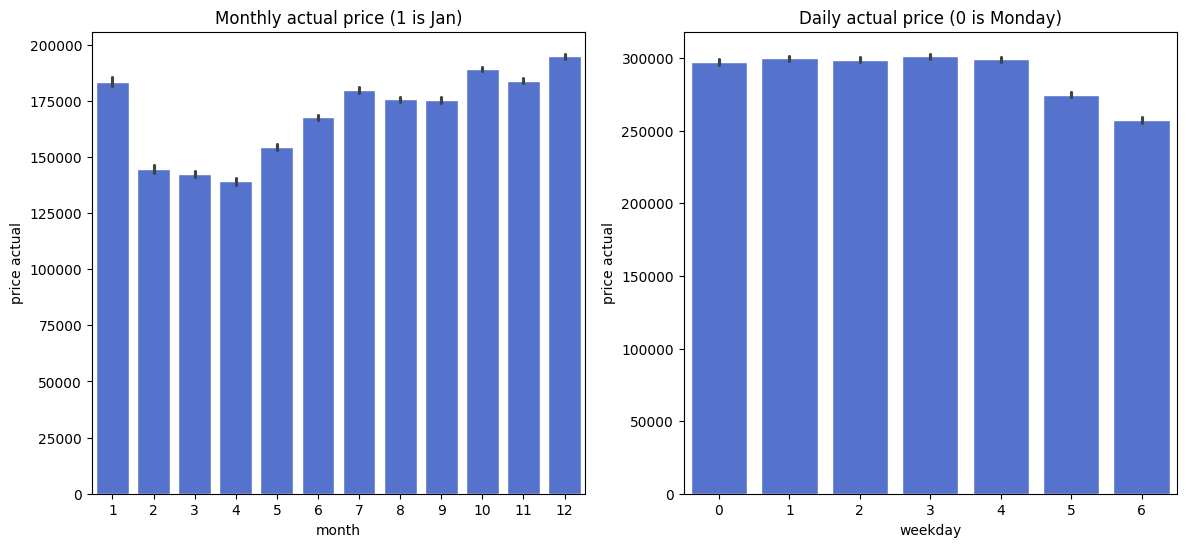

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))
sns.set(style="darkgrid")

sns.barplot(
    x="month",
    y="price actual",
    data=df_weather_energy,
    estimator=sum,
    color='royalblue',
    ax=axes[0]);
axes[0].set_title('Monthly actual price (1 is Jan)')

sns.barplot(
    x="weekday",
    y="price actual",
    data=df_weather_energy,
    estimator=sum,
    color='royalblue',
    ax=axes[1]);
axes[1].set_title('Daily actual price (0 is Monday)')

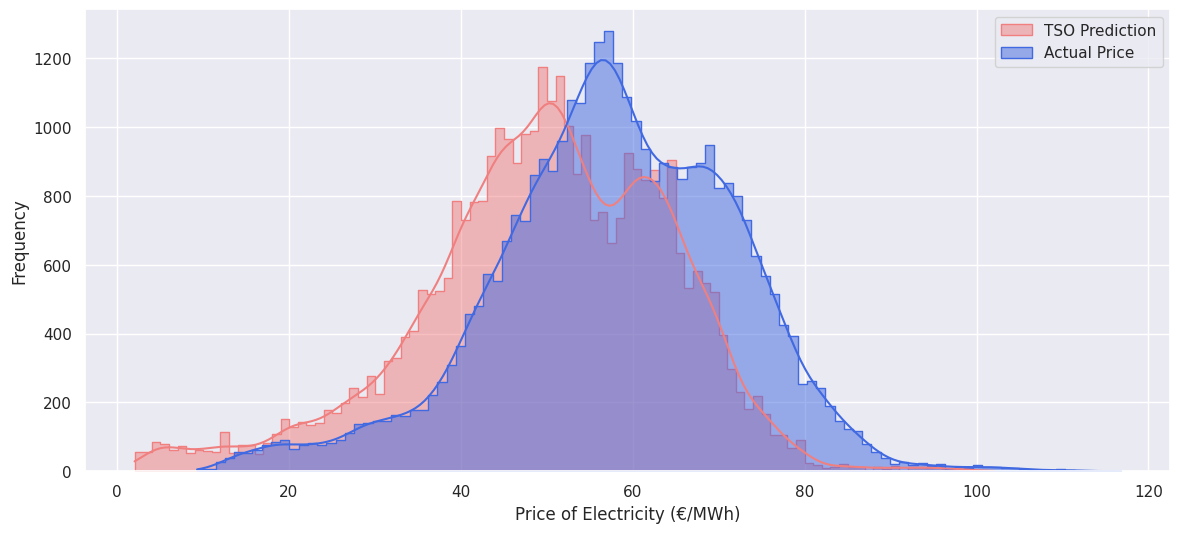

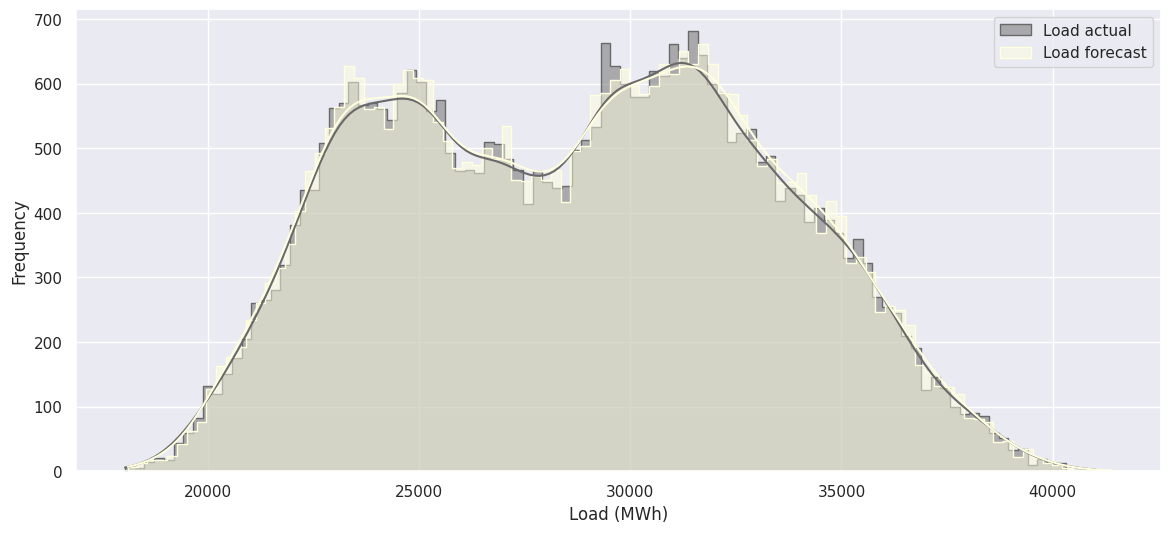

In [ ]:
plt.figure(figsize=(14,6))

gr = sns.histplot(df_weather_energy['price day ahead'], bins=100, label='TSO Prediction', element="step", color='lightcoral', kde = True)
gr = sns.histplot(df_weather_energy['price actual'], bins=100, label='Actual Price', element="step", color='royalblue', kde = True)


gr.set(xlabel="Price of Electricity (€/MWh)", ylabel="Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
gr = sns.histplot(df_weather_energy['total load actual'], bins=100, label='Load actual', element="step", color='dimgrey', kde = True)
gr = sns.histplot(df_weather_energy['total load forecast'], bins=100, label='Load forecast', element="step", color='lightyellow', kde = True)

gr.set(xlabel="Load (MWh)", ylabel="Frequency")
plt.legend()
plt.show()

In [ ]:
y_scaler_actual = MinMaxScaler()
y_scaler_dayahead = MinMaxScaler()

train_cutoff = int(0.8*df_weather_energy.shape[0])
val_cutoff = int(0.9*df_weather_energy.shape[0])

y_price_actual   = df_weather_energy[['price actual']]
y_price_dayahead = df_weather_energy[['price day ahead']]

y_scaler_actual.fit(y_price_actual[:train_cutoff])
actual_norm = y_scaler_actual.transform(y_price_actual)

y_scaler_dayahead.fit(df_weather_energy[['price day ahead']][:train_cutoff])
dayahead_norm = y_scaler_dayahead.transform(y_price_dayahead)

print(f' mean absolute error for normalized acutal price and TSO predcition is : {round(mean_absolute_error(actual_norm, dayahead_norm),3)}')

 mean absolute error for normalized acutal price and TSO predcition is : 0.071


In [ ]:

df_weather_energy.drop(['total load forecast'], axis = 1, inplace = True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


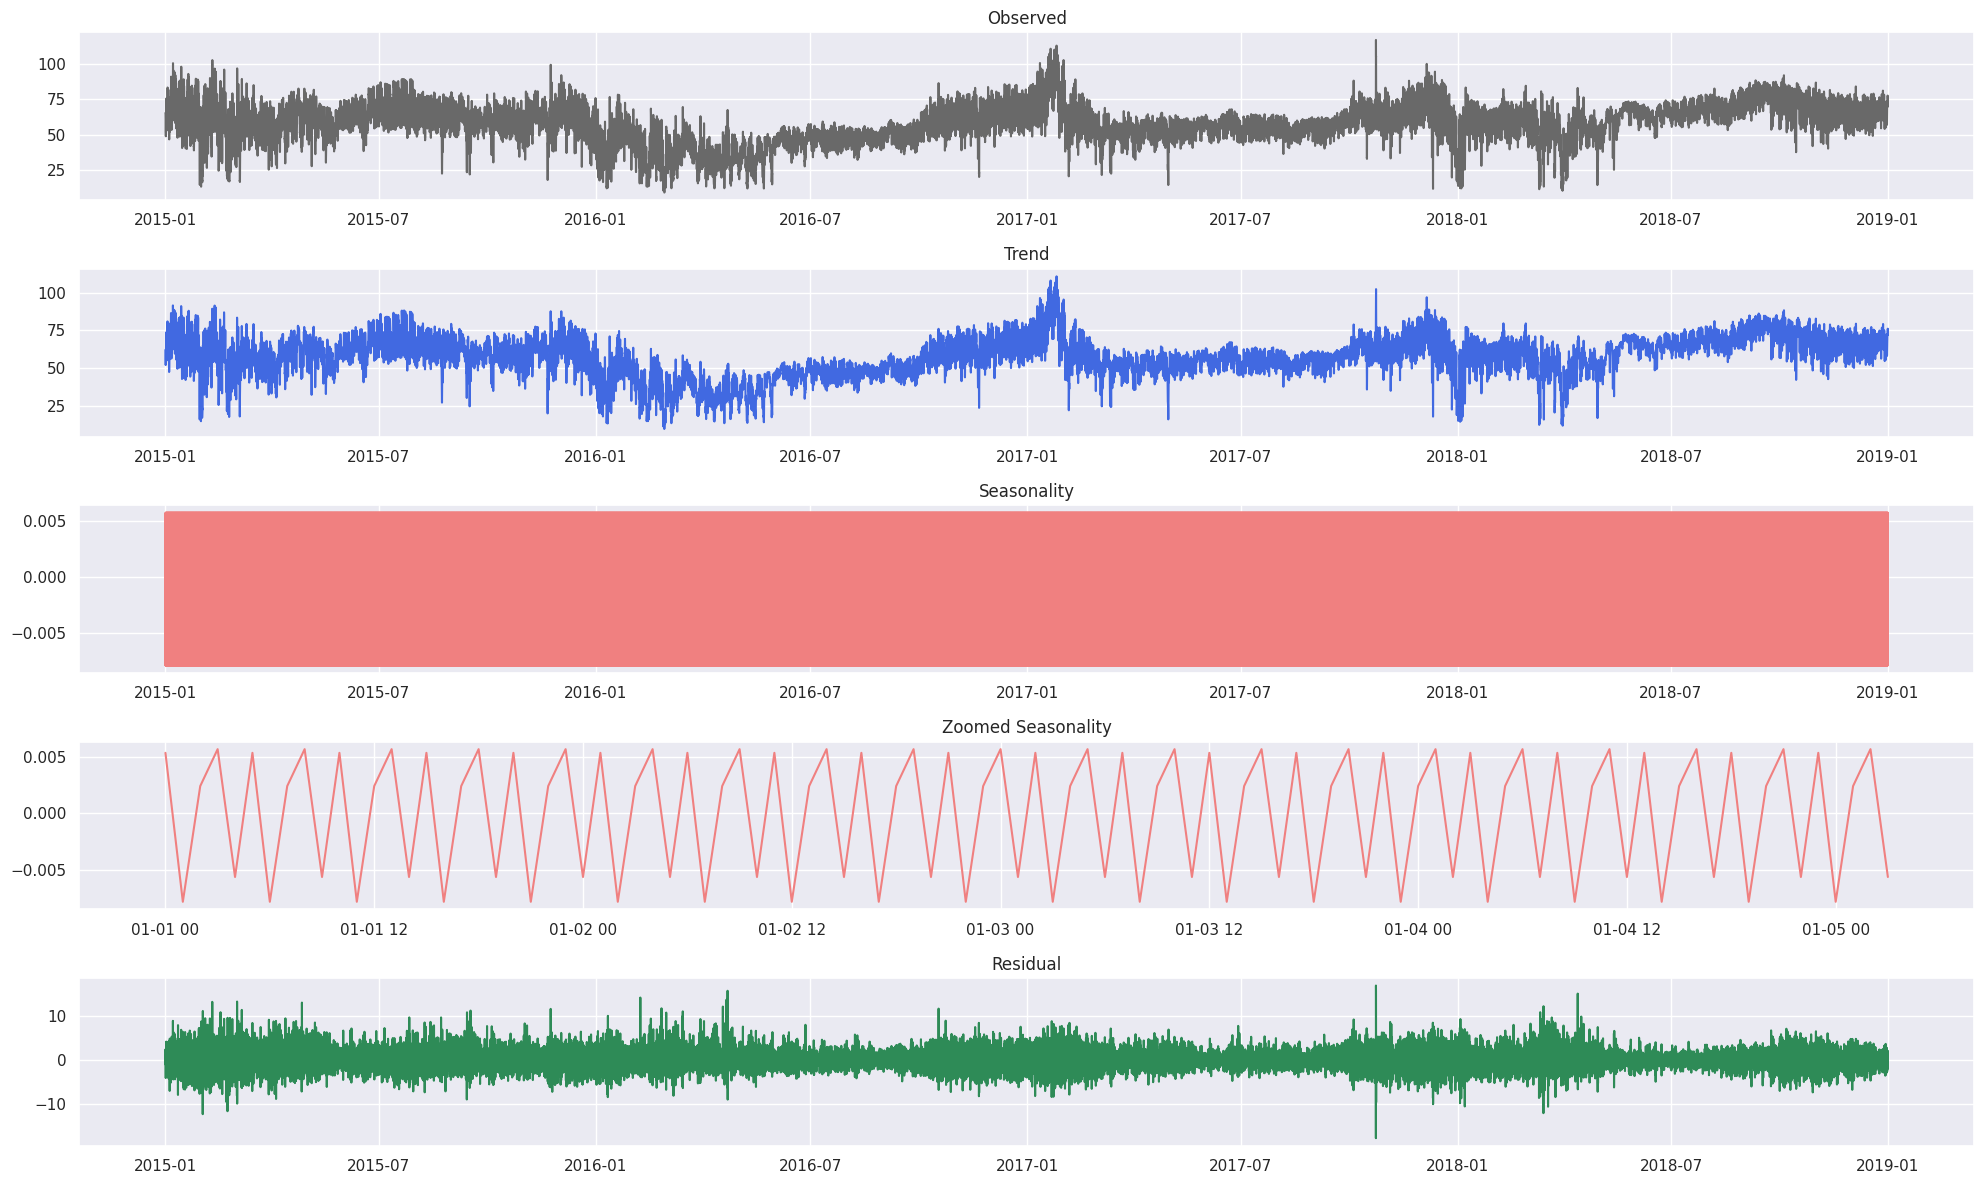

In [ ]:
fig, axes = plt.subplots(5, 1, figsize=(20, 12))
decom_data = df_weather_energy[['price actual']].copy()

decompose_result = seasonal_decompose(decom_data, period =5, model='additive')

observed    = decompose_result.observed
trend    = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

axes[0].plot(observed, color='dimgrey')
axes[0].set_title('Observed')
axes[1].plot(trend, color='royalblue')
axes[1].set_title('Trend')
axes[2].plot(seasonal, color='lightcoral')
axes[2].set_title('Seasonality')
axes[3].plot(seasonal[:100], color='lightcoral')
axes[3].set_title('Zoomed Seasonality')
axes[4].plot(residual, color='seagreen')
axes[4].set_title('Residual')

fig.tight_layout()
plt.show()


In [ ]:
result = adfuller(df_weather_energy[['price actual']])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -9.14701623285118
p-value: 2.7504934849343494e-15
Critical Values: {'1%': np.float64(-3.4305367814665044), '5%': np.float64(-2.8616225527935106), '10%': np.float64(-2.566813940257257)}


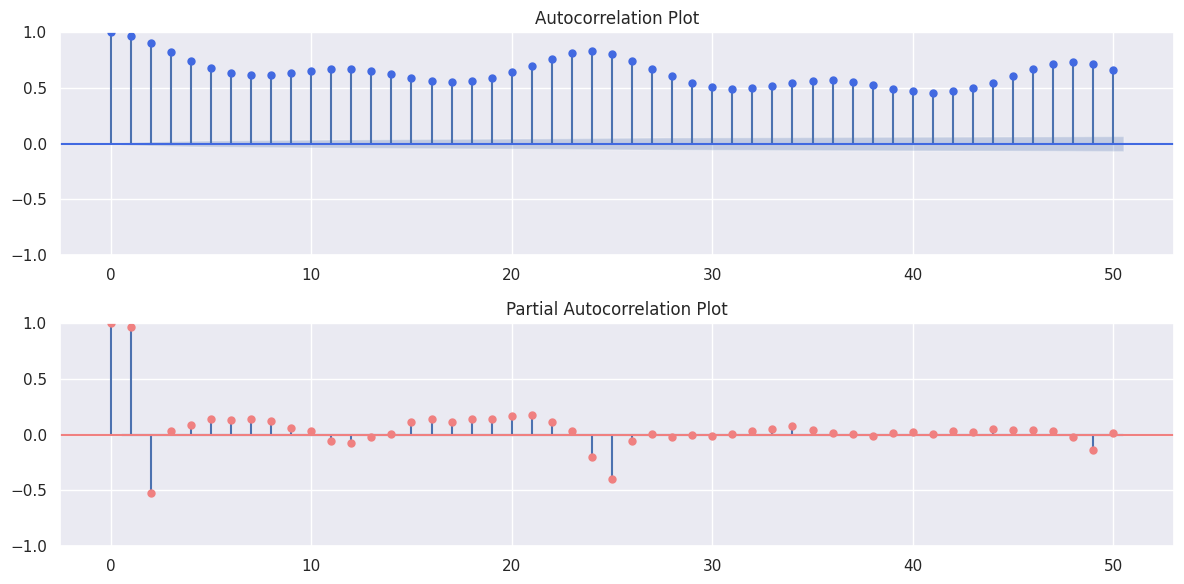

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))
plot_acf(df_weather_energy['price actual'], lags=50, ax=ax[0], color='royalblue')
ax[0].set_title('Autocorrelation Plot')
plot_pacf(df_weather_energy['price actual'], lags=50, ax=ax[1], color='lightcoral')
ax[1].set_title('Partial Autocorrelation Plot')
plt.tight_layout()
plt.show()

# Dimensionality reduction and train-test split

In [ ]:
X = df_weather_energy.drop(['price actual'], axis = 1)
y= df_weather_energy[['price actual']]

In [ ]:
from sklearn.decomposition import PCA

def apply_PCA(X_input, cum_variance, if_apply):

    if if_apply:

        pca = PCA(n_components = cum_variance)
        # make pipeline to first standardize then apply PCA on data
        scaler_pca = make_pipeline(MinMaxScaler(), pca)
        X_pca = scaler_pca.fit(X_input).transform(X_input)

        return X_pca

    else:

        return np.array(X_input)

In [ ]:
params_pca = {'cum_variance' : 0.8, 'if_apply' : True }
X_pca = apply_PCA(X, **params_pca)
X_pca.shape

(35064, 15)

In [ ]:
def windowing(X_input,y_input, history_size):

    data = []
    labels = []
    for i in range(history_size, len(y_input)):
        data.append(X_input[i - history_size : i, :])
        labels.append(y_input[i])

    return np.array(data), np.array(labels).reshape(-1,1)

In [ ]:

train_cutoff = int(0.8*X_pca.shape[0])
val_cutoff   = int(0.9*X_pca.shape[0])

scaler_y = MinMaxScaler()
scaler_y.fit(y[:train_cutoff])
y_norm = scaler_y.transform(y)

In [ ]:
hist_size= 24
data_norm = np.concatenate((X_pca,y_norm), axis = 1)

X_train, y_train = windowing(data_norm[:train_cutoff,:],data_norm[:train_cutoff,-1], hist_size)
X_val, y_val     = windowing(data_norm[train_cutoff :val_cutoff,:],data_norm[train_cutoff:val_cutoff,-1], hist_size)
X_test, y_test   = windowing(data_norm[val_cutoff :,:],data_norm[val_cutoff:,-1], hist_size)

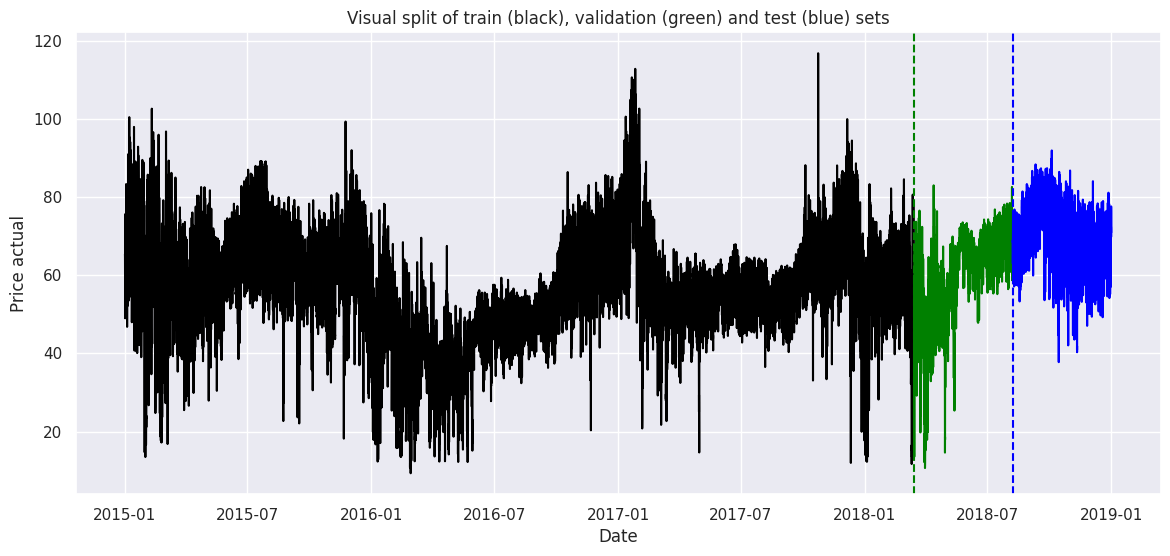

In [ ]:
fig, axes = plt.subplots(figsize = (14,6))
axes.plot(df_weather_energy['price actual'].iloc[:train_cutoff], color = 'black')
axes.plot(df_weather_energy['price actual'].iloc[train_cutoff + 1 : val_cutoff], color = 'green')
axes.plot(df_weather_energy['price actual'].iloc[val_cutoff + 1 :], color = 'blue')
axes.axvline(x=df_weather_energy.index[train_cutoff], color='green', linestyle='--')
axes.axvline(x=df_weather_energy.index[val_cutoff], color='blue', linestyle='--')
axes.set_title('Visual split of train (black), validation (green) and test (blue) sets')
axes.set_xlabel('Date')
axes.set_ylabel('Price actual')
plt.show()


# Forecasting

#LSTM

In [ ]:
from keras.optimizers import Adam
def base_model_lstm():

    model = Sequential()
    model.add(LSTM(units = 32, return_sequences = True, activation="relu", input_shape = X_train.shape[-2:]))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))

    return model

optimizer = Adam(learning_rate=0.001)

lstm_model = base_model_lstm()
lstm_model.compile(optimizer=optimizer, loss='mean_absolute_error')
lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 24, 32)         │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,833 (409.50 KB)

 Trainable params: 104,833 (409.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = lstm_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs =100,
                   batch_size = 32, callbacks=[callback])

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



Epoch 1/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 180s 204ms/step - loss: 0.0695 - val_loss: 0.0478
Epoch 2/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 199s 202ms/step - loss: 0.0397 - val_loss: 0.0391
Epoch 3/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 202s 203ms/step - loss: 0.0337 - val_loss: 0.0334
Epoch 4/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 204s 205ms/step - loss: 0.0299 - val_loss: 0.0251
Epoch 5/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 188s 214ms/step - loss: 0.0279 - val_loss: 0.0231
Epoch 6/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 203s 216ms/step - loss: 0.0253 - val_loss: 0.0227
Epoch 7/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 189s 201ms/step - loss: 0.0241 - val_loss: 0.0204
Epoch 8/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 216s 217ms/step - loss: 0.0226 - val_loss: 0.0177
Epoch 9/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 200s 214ms/step - loss: 0.0212 - val_loss: 0.0177
Epoch 10/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 184s 211ms/step - loss: 0.0208 - val_loss: 0.0167
Epoch 11/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 189s 216ms/step - loss: 0.0198 - val_loss: 0.01

In [ ]:
import matplotlib.pyplot as plt

def plot_results(predicted, actual, history, model_name='Model'):
    plt.figure(figsize=(14,6))

    #actual vs predicted
    plt.subplot(1,2,1)
    plt.plot(actual, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f'{model_name} Prediction')
    plt.xlabel('Time step')
    plt.ylabel('Value')
    plt.legend()

    #training history
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step


---------------------------------------------------
LSTM MAE for test set : 0.015
---------------------------------------------------



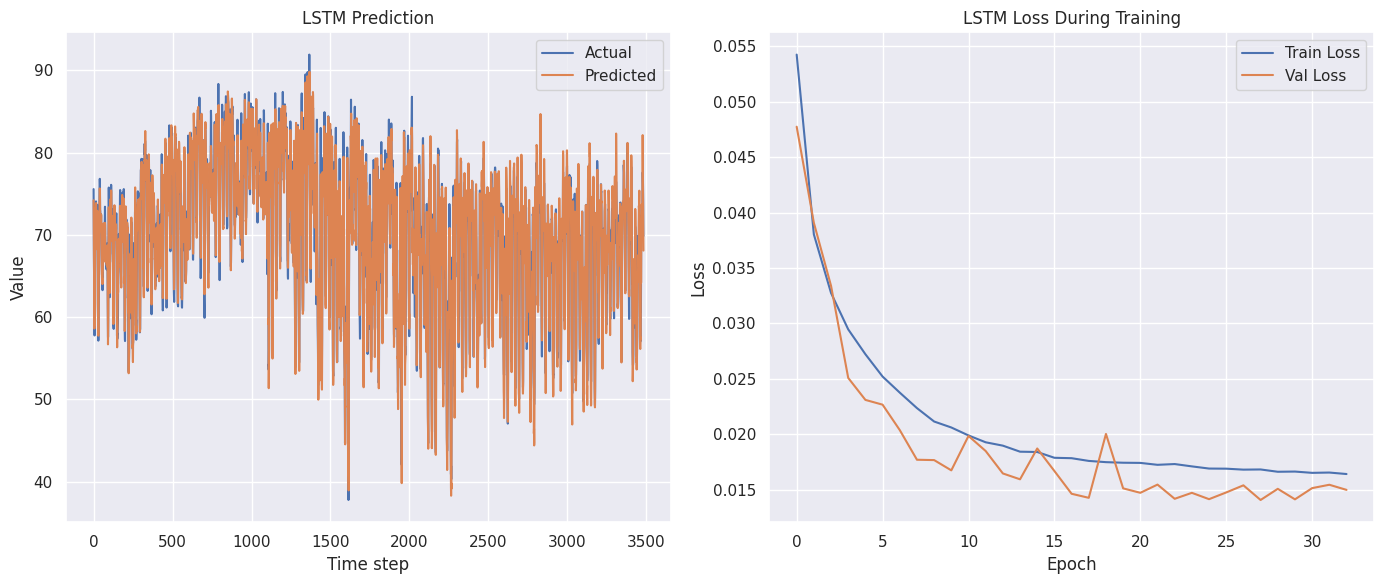

In [ ]:
y_pred = lstm_model.predict(X_test)
y_test_inv = scaler_y.inverse_transform(y_test)
print('')
print('')
print('---------------------------------------------------')
print(f'LSTM MAE for test set : {round(mean_absolute_error(y_pred,y_test),3)}')
print('---------------------------------------------------')
y_pred_actual = scaler_y.inverse_transform(y_pred)
print('')
plot_results(y_pred_actual, y_test_inv, history,'LSTM')

#XGBOOST

In [ ]:
def reshaping(X):

    reshaped_x = X.reshape(-1 , X.shape[1] * X.shape[2])
    return reshaped_x

X_train_xgb = reshaping(X_train)
X_val_xgb   = reshaping(X_val)
X_test_xgb  = reshaping(X_test)

In [ ]:
from xgboost.callback import EarlyStopping
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    eval_metric='mae',
    early_stopping_rounds=8
)

xgb_model.fit(
    X_train_xgb, y_train,
    eval_set=[(X_val_xgb, y_val)],
    verbose=False
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=8,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
def plot_results(y_pred_actual, y_test_inv, model, model_name):
    fig, ax = plt.subplots(2, 1, figsize=(12, 6))

    ax[0].plot(y_pred_actual[:1000])
    ax[0].plot(y_test_inv[:1000])
    ax[0].legend(['prediction', 'actual'], loc='upper left')
    ax[0].set_title(f'Prediction vs actual price for 1000 observation in test set ({model_name})')
    ax[0].set_xlabel('Observation')
    ax[0].set_ylabel('Price')

    if model != 'hybrid':

        if model_name == 'XGBoost':

            train_mae = model.evals_result()['validation_0']['mae']  # <-- Use 'validation_0' here
            val_mae = model.evals_result()['validation_0']['mae']    # <-- Use 'validation_0' here
            ax[1].plot(train_mae, label='Training MAE')
            ax[1].plot(val_mae, label='Validation MAE')

        else:

            ax[1].plot(history.history['loss'], label='Training Loss')
            ax[1].plot(history.history['val_loss'], label='Validation Loss')

        ax[1].legend()
        ax[1].set_title(f'Training and validation MAE ({model_name})')
        ax[1].set_xlabel('Iteration/Epochs')
        ax[1].set_ylabel('MAE')

    fig.tight_layout()
    plt.show()




---------------------------------------------------
XGBoost MAE for test set : 0.016
---------------------------------------------------



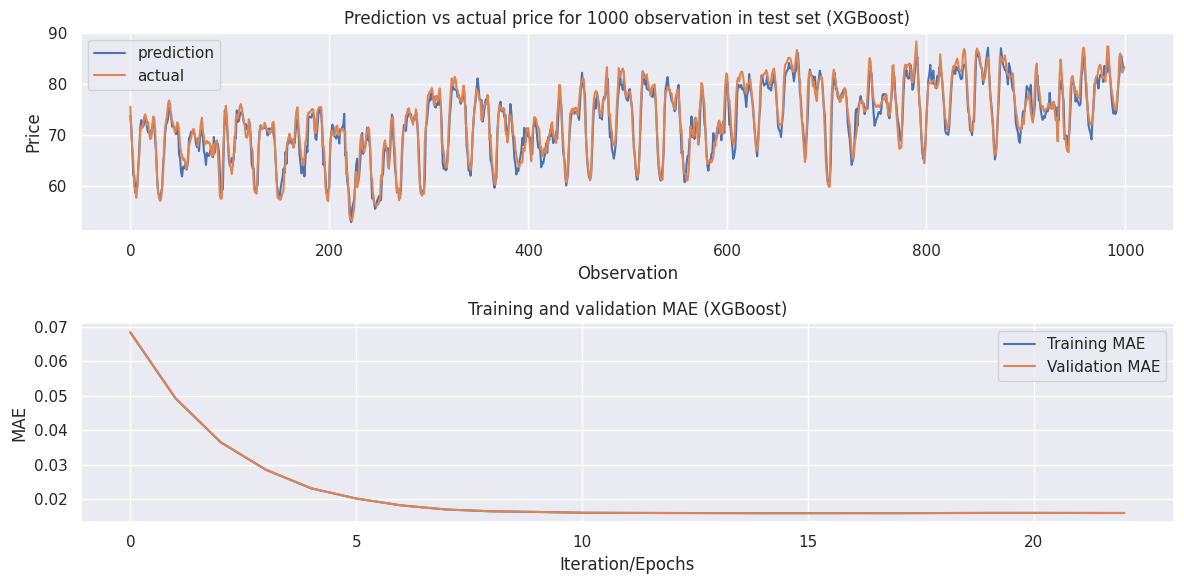

In [ ]:
y_pred = xgb_model.predict(X_test_xgb)
y_pred_actual = scaler_y.inverse_transform(y_pred.reshape(-1,1))
y_test_inv = scaler_y.inverse_transform(y_test)


print('')
print('')
print('---------------------------------------------------')
print(f'XGBoost MAE for test set : {round(mean_absolute_error(y_pred,y_test),3)}')
print('---------------------------------------------------')
print('')
plot_results(y_pred_actual, y_test_inv, xgb_model,'XGBoost')

#hybrid LSTM-ATTENTION

In [ ]:
def LSTM_attention():
    inputs = Input(shape=(hist_size, X_train.shape[2]))
    masked = Masking(mask_value=0.)(inputs)
    lstm = LSTM(132, return_sequences=True)(masked)
    attention = dot([lstm, lstm], axes=[2, 2])
    attention = Dense(hist_size, activation='softmax')(attention)
    context = dot([attention, lstm], axes=[2, 1])
    flattened = Flatten()(context)
    output = Dense(1)(flattened)
    model = Model(inputs=inputs, outputs=output)

    return model

optimizer = Adam(learning_rate=0.001)
LSTM_attention_model = LSTM_attention()
LSTM_attention_model.compile(optimizer=optimizer, loss='mae')

history = LSTM_attention_model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[callback])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



876/876 ━━━━━━━━━━━━━━━━━━━━ 60s 69ms/step - loss: 0.0637 - val_loss: 0.0310
Epoch 2/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0332 - val_loss: 0.0299
Epoch 3/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0252 - val_loss: 0.0254
Epoch 4/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0214 - val_loss: 0.0175
Epoch 5/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0204 - val_loss: 0.0179
Epoch 6/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - loss: 0.0191 - val_loss: 0.0173
Epoch 7/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0194 - val_loss: 0.0156
Epoch 8/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - loss: 0.0184 - val_loss: 0.0162
Epoch 9/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 60s 69ms/step - loss: 0.0185 - val_loss: 0.0162
Epoch 10/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 82s 69ms/step - loss: 0.0181 - val_loss: 0.0149
Epoch 11/100
876/876 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - loss: 0.0180 - val_loss: 0.0167
Epoch 12/100
876/876 ━━━━━━━━━━

109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


---------------------------------------------------
LSTM-Attention MAE for test set : 0.015
---------------------------------------------------



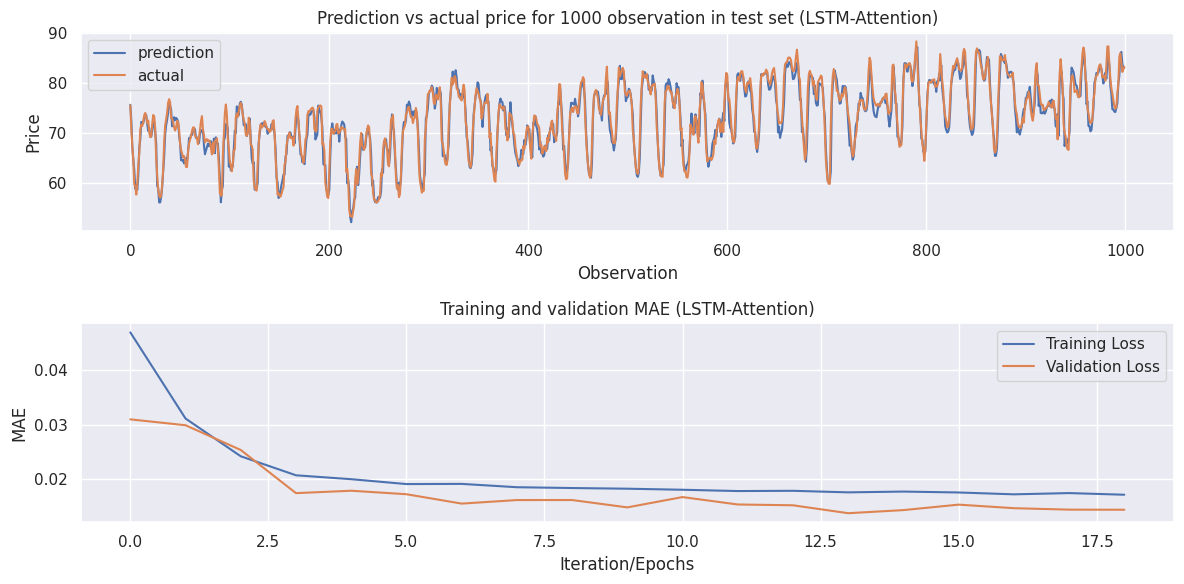

In [ ]:
y_pred = LSTM_attention_model.predict(X_test)
print('')
print('')

print('---------------------------------------------------')
print(f'LSTM-Attention MAE for test set : {round(mean_absolute_error(y_pred,y_test),3)}')
print('---------------------------------------------------')
y_pred_actual = scaler_y.inverse_transform(y_pred)
print('')
plot_results(y_pred_actual, y_test_inv, history,'LSTM-Attention')